<h1><center>  Sleep Efficiency Prediction using the linear regression model polynomial regression model</center></h1>
<h2><center> ensias_ai_club </center></h2> 
<h3><center> ASMAE KARMOUCHI </center></h3>
<h5><center> Academic Year: 2022 - 2023</center></h5>

In [56]:
# Machine Learning and Data Preprocessing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression, r_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [57]:
df =  pd.read_csv("Sleep_Efficiency.csv")

In [58]:
df.head(5)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [60]:
# shape of the data
df.shape

(452, 15)

In [61]:
df.describe()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,436.000000,446.000000
mean,226.500000,40.285398,7.465708,0.788916,23.002212,52.960177,24.831858,1.641204,23.653396,1.245413,1.791480
std,130.625419,13.172250,0.866625,0.135237,3.972466,15.561713,15.150774,1.356762,30.202785,1.643336,1.428134
min,1.000000,9.000000,5.000000,0.500000,15.000000,20.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,113.750000,29.000000,7.000000,0.697500,20.000000,51.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,226.500000,40.000000,7.500000,0.820000,22.000000,60.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,339.250000,52.000000,8.000000,0.900000,27.000000,63.000000,27.250000,3.000000,50.000000,2.000000,3.000000
max,452.000000,69.000000,10.000000,0.990000,30.000000,75.000000,56.000000,4.000000,200.000000,5.000000,5.000000


In [62]:
# number of missing values for each column
print("Number of missing values:\n")
print("by column:")
nan_val_count = df.isnull().sum()
print(nan_val_count, "\n")

som = nan_val_count.sum()
print("Total:", som, end= "~")
print(round(som / (df.shape[0] * df.shape[1]) * 100), "% of the dataset")

Number of missing values:

by column:
ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       16
Smoking status             0
Exercise frequency         6
dtype: int64 

Total: 67~1 % of the dataset


In [63]:
# replace null values with mean
df['Awakenings'].fillna(df['Awakenings'].mean(), inplace=True)
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean(), inplace=True)
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean(), inplace=True)
df['Exercise frequency'].fillna(df['Exercise frequency'].mean(), inplace=True)

In [64]:
# checking for null values
df.isnull().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [65]:
# checking for duplicates
df.duplicated().sum()

0

cleaning

In [66]:
# drop the ID column
df.drop('ID', axis=1, inplace=True)

In [67]:
df.columns

Index(['Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [68]:
# convert object to time format with only hours and minutes
for col in ['Bedtime', 'Wakeup time']:
    df[col] = pd.to_datetime(df[col], format="%Y-%m-%d %H:%M:%S")
    df[col] = df[col].dt.strftime('%H:%M')  # Extraire l'heure et la minute au format HH:MM

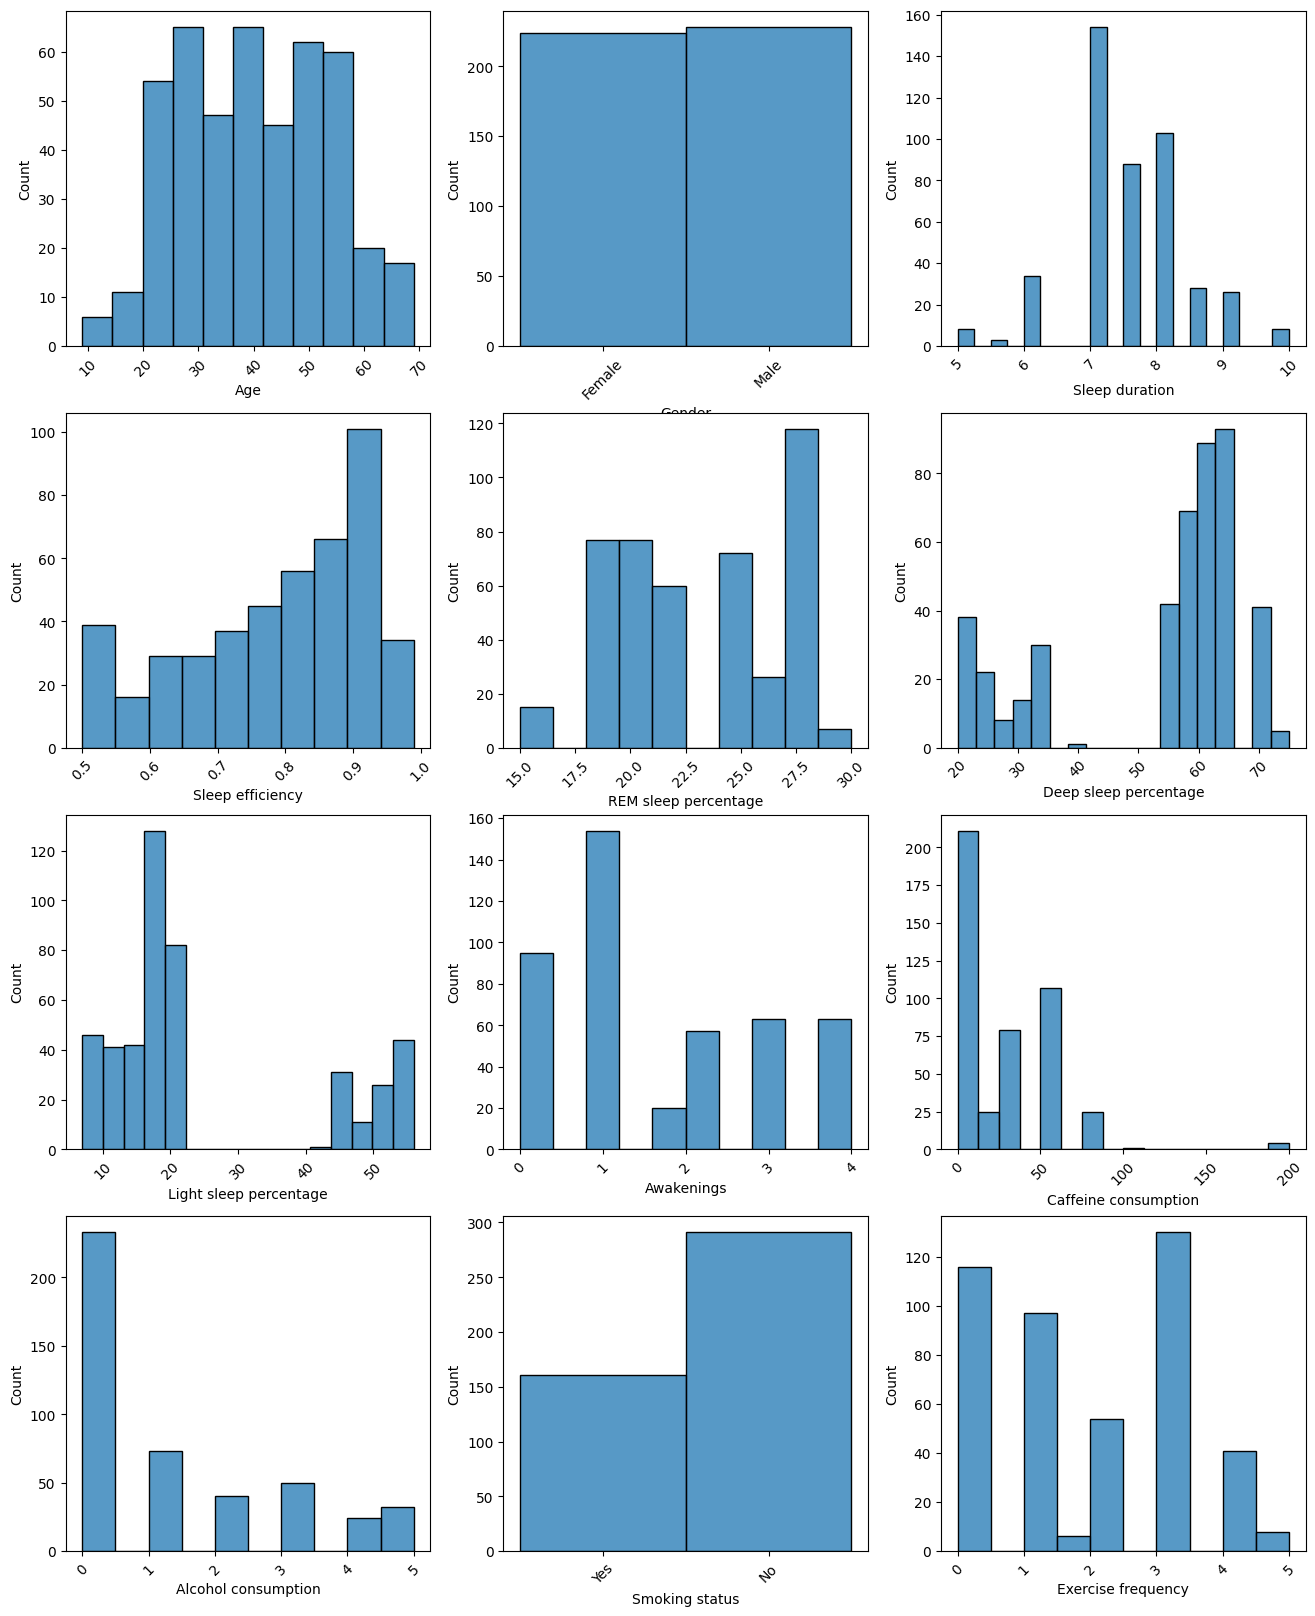

In [69]:
# Create a figure with 3 subplots per row
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,20))
axes=axes.ravel()

# Use the first subplot to plot histograms
first_columns=["Age", "Gender", "Sleep duration", "Sleep efficiency", "REM sleep percentage","Deep sleep percentage","Light sleep percentage", "Awakenings", "Caffeine consumption", "Alcohol consumption", "Smoking status", "Exercise frequency"]
for i, column in enumerate(first_columns):
    sns.histplot(data=df, x=column,ax=axes[i])
    # rotate the x-axis labels by 45 degrees
    axes[i].tick_params(axis='x', rotation=45)

plt.show()

In [70]:
# encoding the categorical data
le = LabelEncoder()

df["Gender"] = le.fit_transform(df["Gender"].astype(str))
df["Smoking status"] = le.fit_transform(df["Smoking status"].astype(str))
df["Bedtime"] = le.fit_transform(df["Bedtime"].astype(str))
df["Wakeup time"] = le.fit_transform(df["Wakeup time"].astype(str))
df["Sleep duration"] = le.fit_transform(df["Sleep duration"].astype(str))

In [71]:
df.head()

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0,2,8,3,0.88,18,70,10,0.0,0.0,0.0,1,3.0
1,69,1,4,12,4,0.66,24,28,53,3.0,0.0,3.0,1,3.0
2,40,0,7,5,6,0.89,20,70,10,1.0,0.0,0.0,0,3.0
3,40,0,5,11,3,0.51,28,25,52,3.0,50.0,5.0,1,1.0
4,57,1,2,12,6,0.76,27,55,18,3.0,0.0,3.0,0,3.0


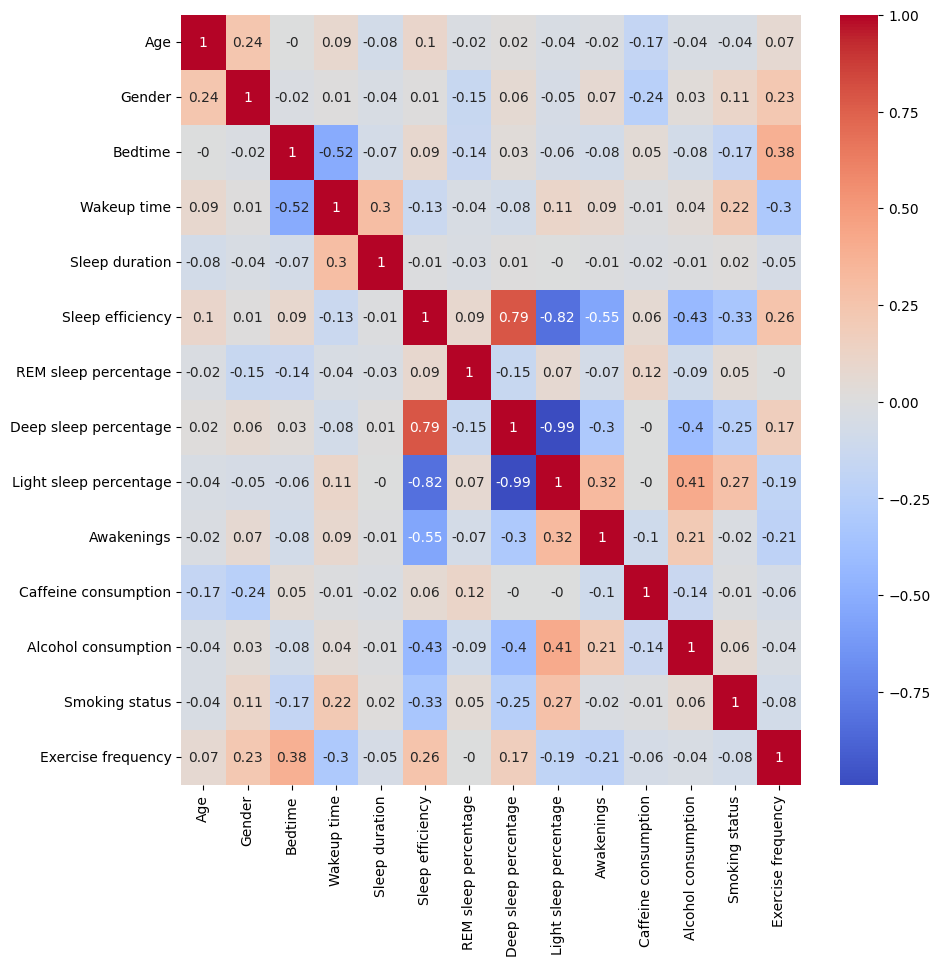

In [72]:
# plot the correlation matrix
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr.round(2), annot=True, cmap='coolwarm')
plt.show()

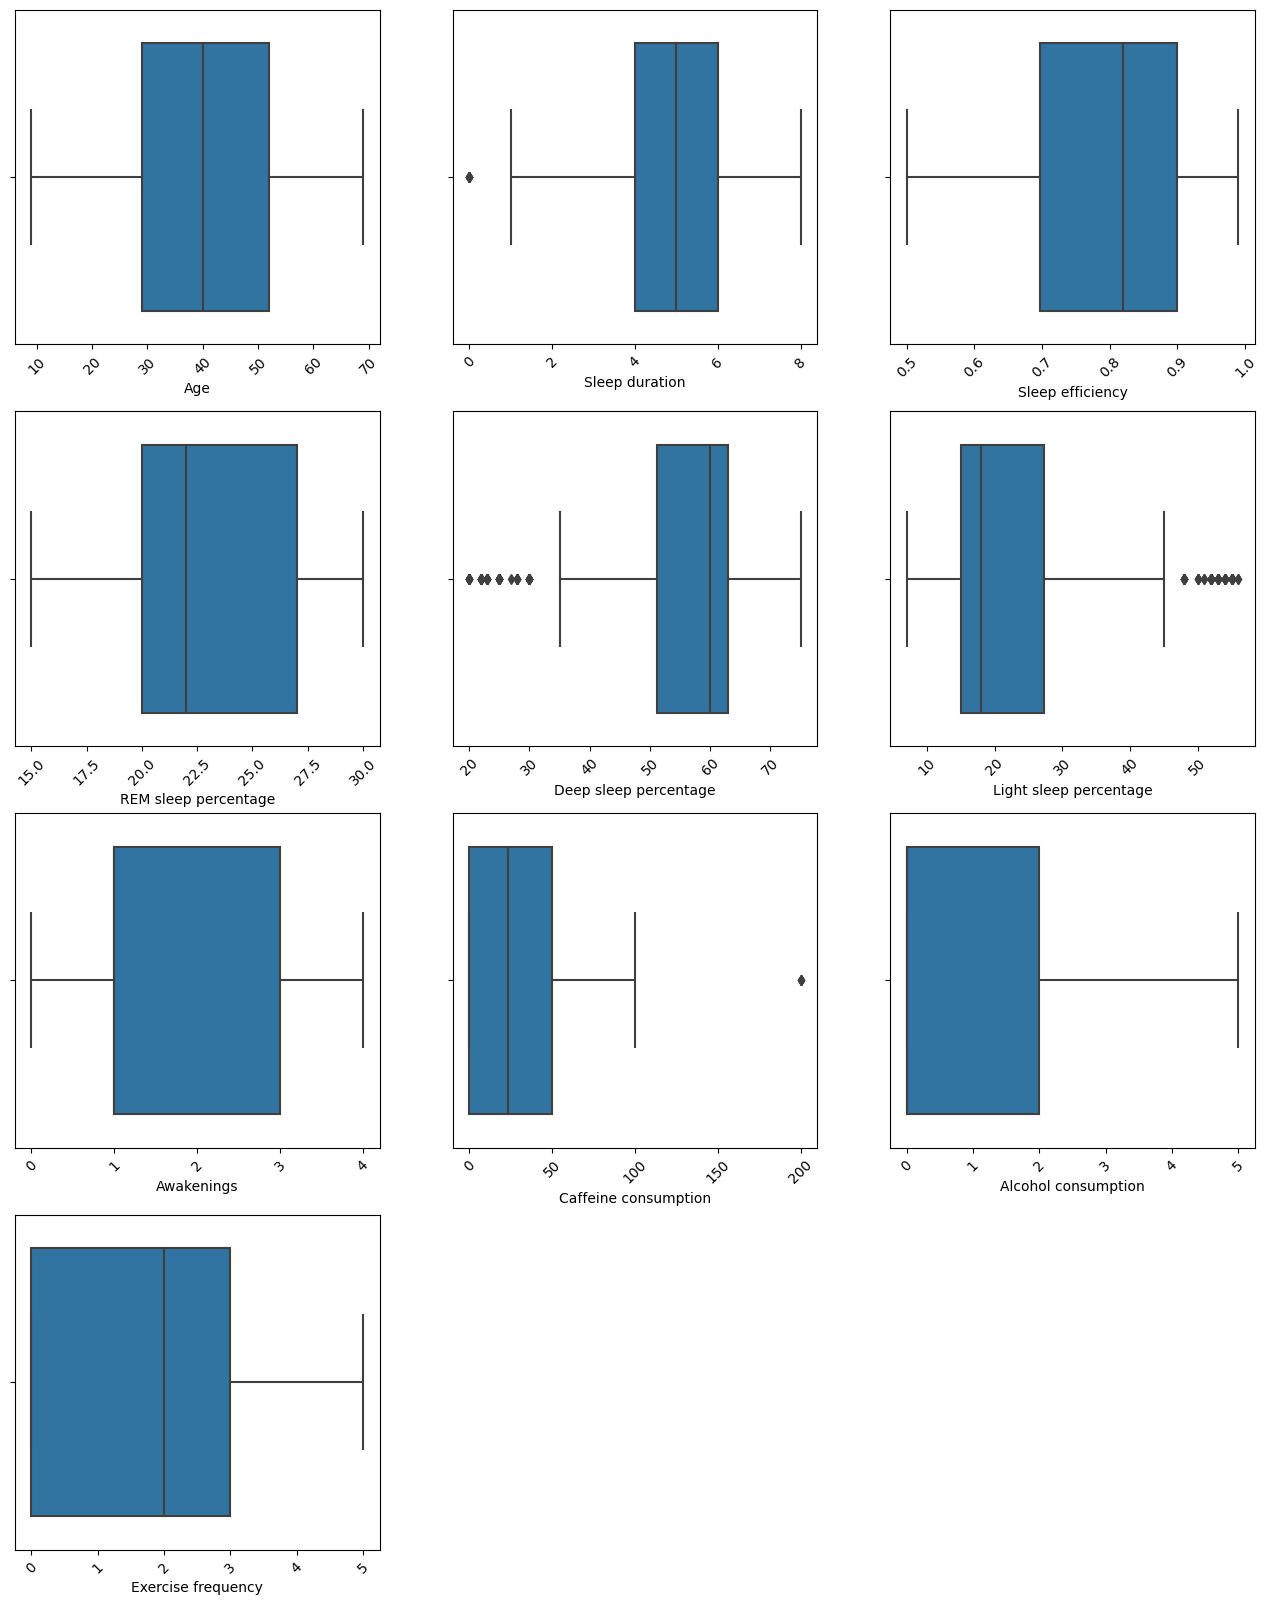

In [73]:
# Create a figure with 3 subplots per row
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,20))
axes=axes.ravel()

# Use the first subplot to plot boxplots
first_columns=["Age", "Sleep duration", "Sleep efficiency", "REM sleep percentage","Deep sleep percentage","Light sleep percentage", "Awakenings", "Caffeine consumption", "Alcohol consumption", "Exercise frequency"]
for i, column in enumerate(first_columns):
    sns.boxplot(data=df, x=column,ax=axes[i])
    # rotate the x-axis labels by 45 degrees
    axes[i].tick_params(axis='x', rotation=45)
for i in range(10,12):
    fig.delaxes(axes[i])

plt.show()

In [74]:
# remove the outliers using quantile from column "Awakenings"
for col in ["Awakenings", "Caffeine consumption", "Deep sleep percentage", "Light sleep percentage"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    # remove the outliers
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]

2.0
50.0
24.25
28.5


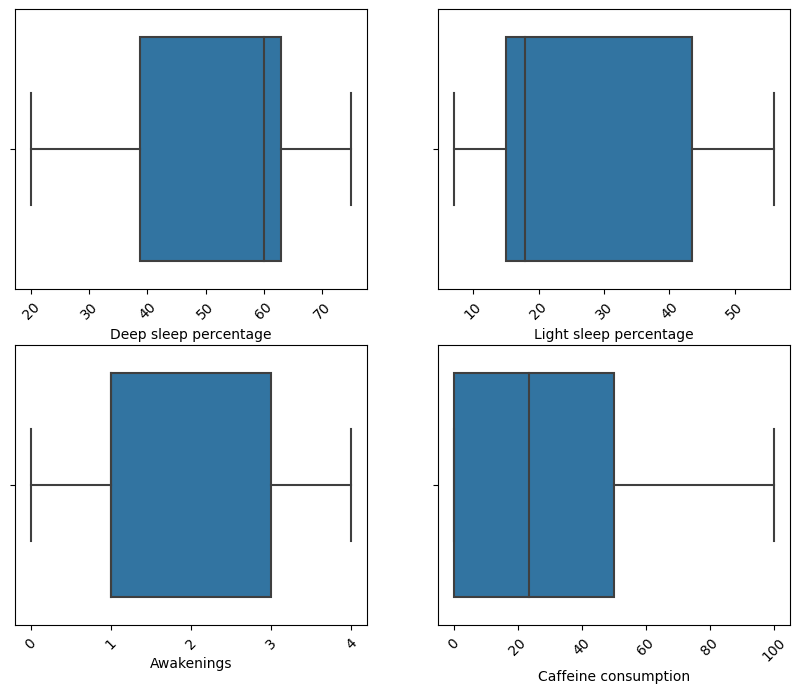

In [75]:
# Create a figure with 3 subplots per row
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes=axes.ravel()

first_columns=["Deep sleep percentage","Light sleep percentage","Awakenings","Caffeine consumption"]
for i, column in enumerate(first_columns):
    sns.boxplot(data=df, x=column,ax=axes[i])
    # rotate the x-axis labels by 45 degrees
    axes[i].tick_params(axis='x', rotation=45)
    
plt.show()

In [76]:
# check the shape of the data after removing the outliers
df.shape

(448, 14)

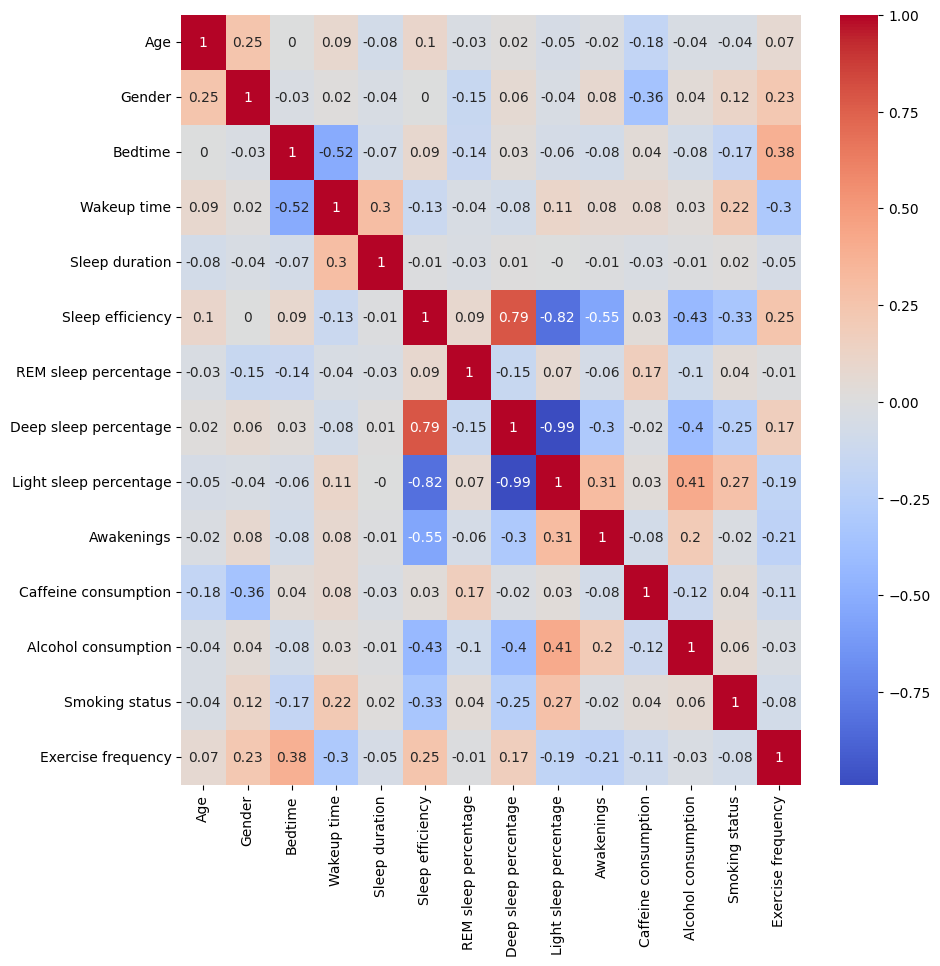

In [77]:
# plot the correlation matrix after cleaning
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr.round(2), annot=True, cmap='coolwarm')
plt.show()

## Dimensionality reduction


In [78]:
# split the data into features and target
X_train = df.drop('Sleep efficiency', axis=1)
y_train = df['Sleep efficiency']

X_train

,Age,Gender,Bedtime,Wakeup time,Sleep duration,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,65,0,2,8,3,18,70,10,0.0,0.000000,0.0,1,3.0
1,69,1,4,12,4,24,28,53,3.0,0.000000,3.0,1,3.0
2,40,0,7,5,6,20,70,10,1.0,0.000000,0.0,0,3.0
3,40,0,5,11,3,28,25,52,3.0,50.000000,5.0,1,1.0
4,57,1,2,12,6,27,55,18,3.0,0.000000,3.0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,27,0,8,5,5,25,57,21,0.0,0.000000,0.0,0,5.0
448,52,1,6,0,3,28,57,21,4.0,25.000000,0.0,0,3.0
449,40,0,10,9,7,20,30,48,1.0,23.653396,3.0,1,0.0
450,45,1,6,2,4,18,70,10,3.0,0.000000,0.0,0,3.0


In [79]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [80]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### using feature elimination

### using feature elimination with correlation criteria

In [81]:
# Feature elimination with correlation
selector = SelectKBest(f_regression, k=10)  # Choose an appropriate value for k
X_train_corr = selector.fit_transform(X_train_scaled, y_train)
X_test_corr = selector.transform(X_test_scaled)


In [82]:
# Linear Regression on Feature elimination with correlation
model_corr = LinearRegression()
model_corr.fit(X_train_corr, y_train)
y_pred_corr = model_corr.predict(X_test_corr)

In [83]:
# PCA with 90% variance
pca_90 = PCA(n_components=0.90)
X_train_pca_90 = pca_90.fit_transform(X_train_scaled)
X_test_pca_90 = pca_90.transform(X_test_scaled)

In [84]:

# PCA with 70% variance
pca_70 = PCA(n_components=0.70)
X_train_pca_70 = pca_70.fit_transform(X_train_scaled)
X_test_pca_70 = pca_70.transform(X_test_scaled)


In [85]:
# Linear Regression on PCA with 90% variance
model_90 = LinearRegression()
model_90.fit(X_train_pca_90, y_train)
y_pred_90 = model_90.predict(X_test_pca_90)

In [86]:

# Linear Regression on PCA with 70% variance
model_70 = LinearRegression()
model_70.fit(X_train_pca_70, y_train)
y_pred_70 = model_70.predict(X_test_pca_70)

In [87]:
# Evaluate the models
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error


mse_90 = mean_squared_error(y_test, y_pred_90)
r2_90 = r2_score(y_test, y_pred_90)



print("PCA with 90% Variance:")
print("Mean Squared Error:", mse_90)
print("R^2 Score:", r2_90)


PCA with 90% Variance:
Mean Squared Error: 0.0037176316365993794
R^2 Score: 0.7814751172242245


In [88]:
mse_70 = mean_squared_error(y_test, y_pred_70)
r2_70 = r2_score(y_test, y_pred_70)

print("\nPCA with 70% Variance:")
print("Mean Squared Error:", mse_70)
print("R^2 Score:", r2_70)


PCA with 70% Variance:
Mean Squared Error: 0.004440018099869953
R^2 Score: 0.7390127560664075


In [89]:
mse_corr = mean_squared_error(y_test, y_pred_corr)
r2_corr = r2_score(y_test, y_pred_corr)
print("\nFeature Elimination with Correlation:")
print("Mean Squared Error:", mse_corr)
print("R^2 Score:", r2_corr)


Feature Elimination with Correlation:
Mean Squared Error: 0.0035316809627293218
R^2 Score: 0.7924054226395025
